In [1]:
#Imports
#Manipulação de dados
import pandas as pd
import numpy as np

#Visualilzação de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import naive_bayes
from sklearn.model_selection import GridSearchCV

#Transformação dos dados
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Métricas
from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix

In [2]:
from platform import python_version
print(python_version())

3.10.9


In [3]:
%reload_ext watermark
%watermark -a "José Guilherme Daufenbach Júnior" --iversion

Author: José Guilherme Daufenbach Júnior

sklearn   : 1.2.1
matplotlib: 3.7.1
seaborn   : 0.12.2
numpy     : 1.22.1
pandas    : 2.0.2



Dicionário de dados:

**Variável:**	Definição - Chave

**Survived:**	Sobrevivência - 0 = Não, 1 = Sim

**Pclass:**	classe de ingresso	1 = 1º, 2 = 2º, 3 = 3º

**Sex:** Sexo	

**Age:** Idade em anos	

**Sibsp:** O conjunto de dados define as relações familiares desta forma... - Irmão = irmão, irmã, meio-irmão, meia-irmã, 
Cônjuge = marido, esposa (amantes e noivos foram ignorados)	

**Parch:** O conjunto de dados define as relações familiares desta forma...
Pai = mãe, pai
Filho = filha, filho, enteada, enteado
Algumas crianças viajaram apenas com babá, portanto parch=0 para elas.

**Ticker:**	Número do bilhete	

**Fare:** Tarifa de passageiro	

**Cabin:** número da cabine	

**Embarked:** Porto de embarcação	C = Cherbourg, Q = Queenstown, S = Southampton

**Notas Variáveis:**



idade : A idade é fracionária se for menor que 1. Se a idade for estimada, está na forma de xx,5




In [4]:
#import dos dados
train = pd.read_csv('dados/train.csv')
test = pd.read_csv('dados/test.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
dados = pd.concat(objs=[train, test], axis = 0)

In [8]:
dados.reset_index(inplace=True)

In [9]:
dados.isnull().sum()

index             0
PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [10]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        1309 non-null   int64  
 1   PassengerId  1309 non-null   int64  
 2   Survived     891 non-null    float64
 3   Pclass       1309 non-null   int64  
 4   Name         1309 non-null   object 
 5   Sex          1309 non-null   object 
 6   Age          1046 non-null   float64
 7   SibSp        1309 non-null   int64  
 8   Parch        1309 non-null   int64  
 9   Ticket       1309 non-null   object 
 10  Fare         1308 non-null   float64
 11  Cabin        295 non-null    object 
 12  Embarked     1307 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 133.1+ KB


In [11]:
dados.Fare.max()

512.3292

In [12]:
dados['Cabin'].isnull().sum()

1014

In [13]:
dados['Cabin'].fillna(value='0', inplace = True)


In [14]:
dados[dados.Pclass == 3]['Cabin'].unique()

array(['0', 'G6', 'F G73', 'F E69', 'E10', 'F G63', 'E121', 'F38',
       'F E46', 'F E57'], dtype=object)

In [15]:
dados[dados.Pclass == 2]['Cabin'].unique()

array(['0', 'D56', 'F33', 'E101', 'F2', 'F4', 'D', 'E77', 'F', 'D38'],
      dtype=object)

In [16]:
dados[dados.Pclass == 1]['Cabin'].unique()

array(['C85', 'C123', 'E46', 'C103', 'A6', 'C23 C25 C27', '0', 'B78',
       'D33', 'B30', 'C52', 'B28', 'C83', 'E31', 'A5', 'D10 D12', 'D26',
       'C110', 'B58 B60', 'D47', 'B86', 'C2', 'E33', 'B19', 'A7', 'C49',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66',
       'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128',
       'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E44', 'A34', 'C104',
       'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30',
       'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22',
       'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20',
       'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126',
       'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'C62 C64', 'E24', 'C90',
       'C45', 'E8', 'B101', 'D45', 'C46', 'D30', 'D11', 'B3', 'D6',
       'B8

In [17]:
dados.drop('Cabin',axis = 1, inplace = True)

In [18]:
dados.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [19]:
dados[dados['Embarked'].isnull()==True]

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [20]:
dados[dados.Fare.isnull()==True]

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1043,152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [21]:
dados[(dados.Pclass == 3) & (dados.Age>= 55)]['Fare'].median()

7.75

In [22]:
dados['Fare'].fillna(7.75, inplace = True)

In [23]:
dados.isnull().sum()

index            0
PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [24]:
probS_female = round(dados[(dados.Survived == 1) & (dados.Sex == 'female')].count()[0] / dados[dados.Survived == 1].count()[0],2)

In [25]:
probS_female

0.68

In [26]:
idade_Mulheres_S = dados[(dados.Survived == 1) & (dados.Sex == 'female') ]['Age'].median()

In [27]:
idade_Mulheres_S

28.0

In [28]:
idade_Mulheres_M = dados[(dados.Survived == 1) & (dados.Sex == 'female') & (dados.Pclass == 1)]['Age'].median()

In [29]:
idade_Mulheres_M

35.0

In [30]:
idade_Homens_S = dados[(dados.Survived == 1) & (dados.Sex == 'male') ]['Age'].median()
idade_Homens_M = dados[(dados.Survived == 0) & (dados.Sex == 'male') ]['Age'].median()
print(idade_Homens_S, idade_Homens_M)

28.0 29.0


In [31]:
probS_people_1C = round(dados[(dados.Survived == 1) & (dados.Pclass == 1)].count()[0] / dados[dados.Pclass == 1].count()[0],2)
probS_people_1C

0.42

In [32]:
probS_people_2C = round(dados[(dados.Survived == 1) & (dados.Pclass == 2)].count()[0] / dados[dados.Pclass == 2].count()[0],2)
probS_people_2C

0.31

In [33]:
probS_people_3C = round(dados[(dados.Survived == 1) & (dados.Pclass == 3)].count()[0] / dados[dados.Pclass == 3].count()[0],2)
probS_people_3C

0.17

In [34]:
dados['Title'] = dados['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [35]:
dados.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [36]:
dados.Title.value_counts()

Title
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64

In [37]:
dados.groupby('Title').agg({'Age': 'mean'})['Age'][:]

Title
Capt            70.000000
Col             54.000000
Don             40.000000
Dona            39.000000
Dr              43.571429
Jonkheer        38.000000
Lady            48.000000
Major           48.500000
Master           5.482642
Miss            21.774238
Mlle            24.000000
Mme             24.000000
Mr              32.252151
Mrs             36.994118
Ms              28.000000
Rev             41.250000
Sir             49.000000
the Countess    33.000000
Name: Age, dtype: float64

In [38]:
dados.Title.unique()


array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [39]:
lista_T_excluir = ['Don', 'Rev', 'Dr', 'Mme', 'Ms','Major', 'Lady', 'Sir',
                   'Mlle', 'Col', 'Capt', 'the Countess','Jonkheer', 'Dona']

In [40]:
dados.replace(to_replace=lista_T_excluir,value='Others', inplace=True)

In [41]:
dados.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Others'], dtype=object)

In [42]:
dict_T = {'Mr': 0,
          'Mrs': 1,
          'Miss': 2, 
          'Master': 3,
          'Others': 4}

In [43]:
dados.isnull().sum()

index            0
PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Title            0
dtype: int64

In [44]:
dados.loc[:]['Title'].replace(to_replace=dict_T.keys(), value=dict_T.values(), inplace = True)

In [45]:
dados['Title'] = dados['Title'].astype(int)

In [46]:
dados.describe()

,index,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Title
count,1309.000000,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,369.478992,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.275964,0.791444
std,248.767105,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.743697,1.074469
min,0.000000,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,327.000000,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,563.000000,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,2.000000
max,890.000000,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,4.000000


In [47]:
dados.corr(numeric_only = True)

,index,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Title
index,1.000000,0.170654,-0.005007,-0.018212,0.012723,-0.027343,0.003911,-0.003391,-0.005421
PassengerId,0.170654,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031024,-0.023397
Survived,-0.005007,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.410593
Pclass,-0.018212,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558743,-0.086197
Age,0.012723,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.177274,-0.268052
SibSp,-0.027343,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160390,0.258333
Parch,0.003911,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221669,0.242599
Fare,-0.003391,0.031024,0.257307,-0.558743,0.177274,0.160390,0.221669,1.000000,0.143980
Title,-0.005421,-0.023397,0.410593,-0.086197,-0.268052,0.258333,0.242599,0.143980,1.000000


In [48]:
dados.dtypes

index            int64
PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
Title            int64
dtype: object

In [49]:
age_fem_1C = round(dados[(dados.Pclass == 1) & (dados.Sex == 'female')].agg({'Age': 'mean'})[0])
age_fem_1C

37

In [50]:
age_fem_2C = round(dados[(dados.Pclass == 2) & (dados.Sex == 'female')].agg({'Age': 'mean'})[0])
age_fem_2C

27

In [51]:
age_fem_3C = round(dados[(dados.Pclass == 3) & (dados.Sex == 'female')].agg({'Age': 'mean'})[0])
age_fem_3C

22

In [52]:
age_m_1C = round(dados[(dados.Pclass == 1) & (dados.Sex == 'male')].agg({'Age': 'mean'})[0])
age_m_1C

41

In [53]:
age_m_2C = round(dados[(dados.Pclass == 2) & (dados.Sex == 'male')].agg({'Age': 'mean'})[0])
age_m_2C

31

In [54]:
age_m_3C = round(dados[(dados.Pclass == 3) & (dados.Sex == 'male')].agg({'Age': 'mean'})[0])
age_m_3C

26

In [55]:
dados['Age'].isnull().sum()

263

In [56]:
age = dados['Age'].copy()

for i in dados.index:
    if pd.isnull(dados['Age'][i]):
        if dados.loc[i]['Pclass'] == 1 and dados.loc[i ,'Sex'] == 'female':
            age[i] = age_fem_1C
            
        if dados.loc[i]['Pclass'] == 2 and dados.loc[i ,'Sex'] == 'female':
            age[i] = age_fem_2C
            
        if dados.loc[i]['Pclass'] == 3 and dados.loc[i ,'Sex'] == 'female':
            age[i] = age_fem_3C
            
        if dados.loc[i]['Pclass'] == 1 and dados.loc[i ,'Sex'] == 'male':
            age[i] = age_m_1C
            
        if dados.loc[i]['Pclass'] == 2 and dados.loc[i ,'Sex'] == 'male':
            age[i] = age_m_2C
            
        if dados.loc[i]['Pclass'] == 3 and dados.loc[i ,'Sex'] == 'male':
            age[i] = age_m_3C
            
dados['Age'] = age           

    

In [57]:
dados.isnull().sum()

index            0
PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Title            0
dtype: int64

In [58]:
dados[dados.Embarked.isnull()]

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
61,61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN,2
829,829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN,1


In [59]:
dados.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [60]:
dados.Embarked.describe()

count     1307
unique       3
top          S
freq       914
Name: Embarked, dtype: object

In [61]:
dados.Embarked.fillna('S', inplace=True)

In [62]:
dados.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [63]:
dados.loc[:]['Embarked'].replace(to_replace=['S', 'C', 'Q'], value=[0,1,2], inplace = True)

In [64]:
dados.drop(columns=['index'], inplace=True)

In [65]:
dados.loc[:]['Sex'].replace(to_replace=['female', 'male'], value=[0,1], inplace = True)

In [66]:
dados.drop(columns = ['Name', 'Ticket'], inplace = True)

In [67]:
dados.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0.0,3,1,22.0,1,0,7.2500,0,0
1,2,1.0,1,0,38.0,1,0,71.2833,1,1
2,3,1.0,3,0,26.0,0,0,7.9250,0,2
3,4,1.0,1,0,35.0,1,0,53.1000,0,1
4,5,0.0,3,1,35.0,0,0,8.0500,0,0


In [68]:
dados[['Sex', 'Embarked']] = dados[['Sex', 'Embarked']].astype(int)

In [69]:
dados.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int64
Title            int64
dtype: object

In [70]:
categoricas = ['Passengerid', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Title']
numericas = ['Age', 'Fare']
target = ['Target']

In [71]:
dados.rename(columns={'Survived': 'Target'}, inplace=True)

In [72]:
dados[:891][:].tail()

,PassengerId,Target,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
886,887,0.0,2,1,27.0,0,0,13.00,0,4
887,888,1.0,1,0,19.0,0,0,30.00,0,2
888,889,0.0,3,0,22.0,1,2,23.45,0,2
889,890,1.0,1,1,26.0,0,0,30.00,1,0
890,891,0.0,3,1,32.0,0,0,7.75,2,0


In [73]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [74]:
X = dados[:891][['PassengerId', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Title','Age', 'Fare']]
Y = dados[:891][['Target']]

In [75]:
X[numericas] = X[numericas].astype(float)

In [76]:
df_submit = dados[891:][:]

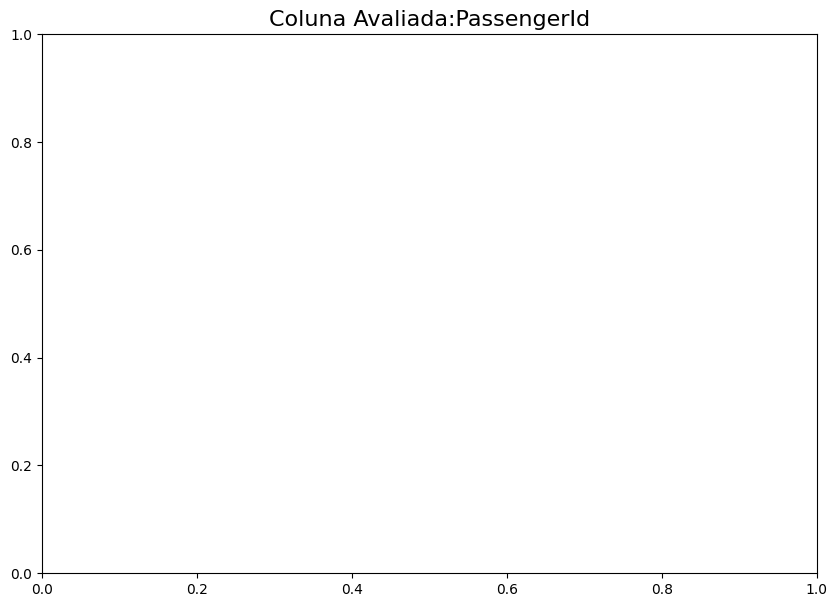

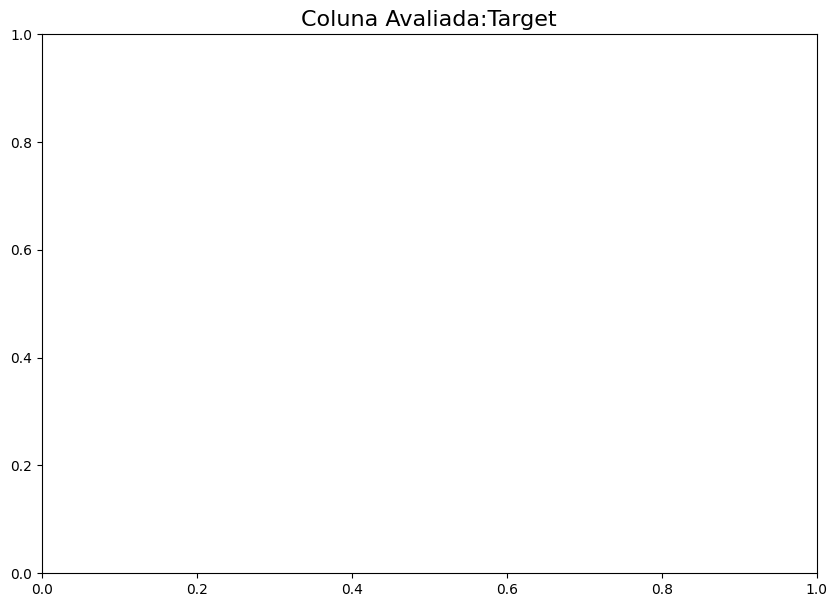

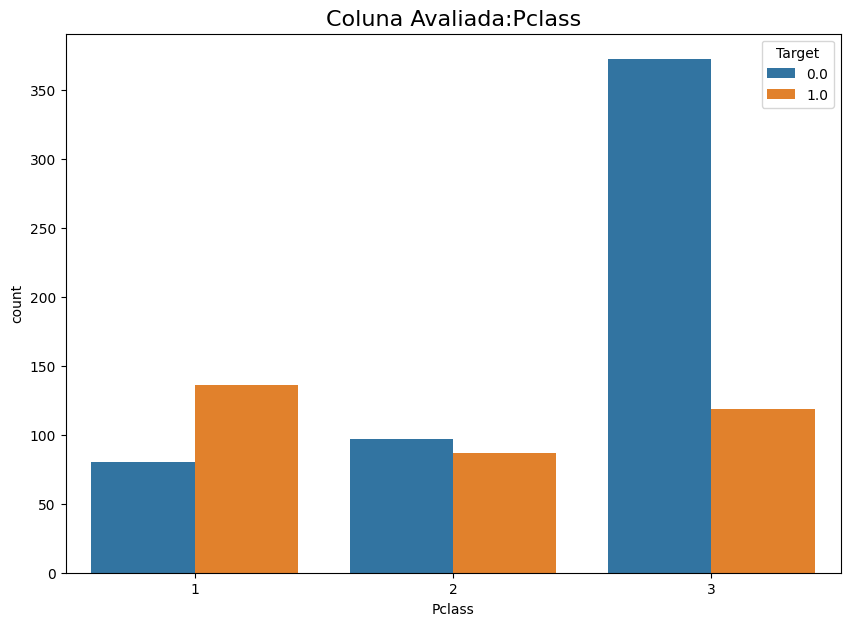

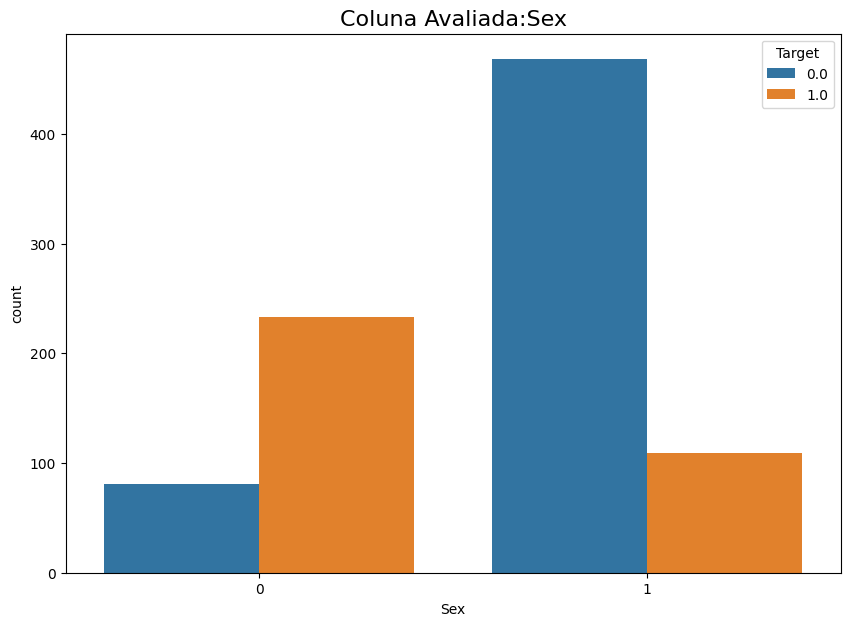

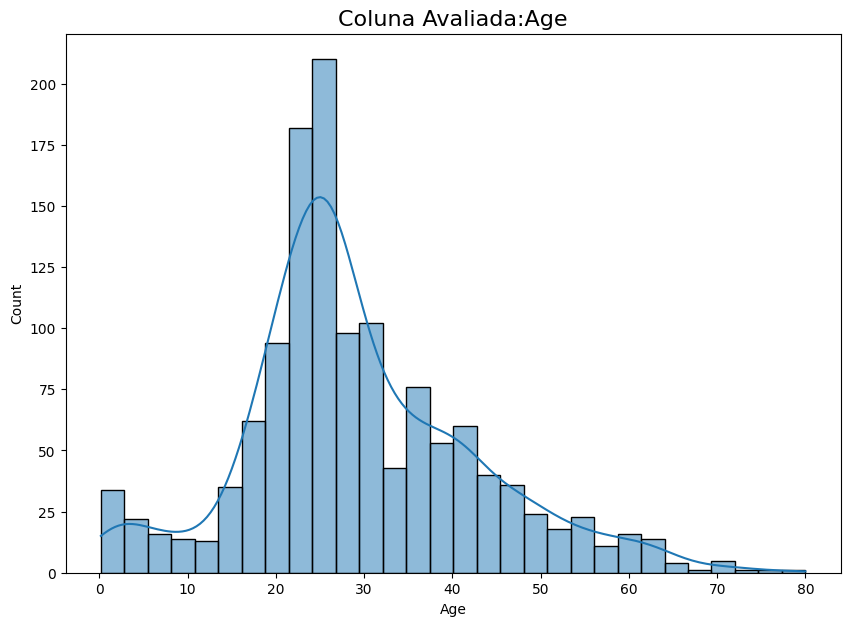

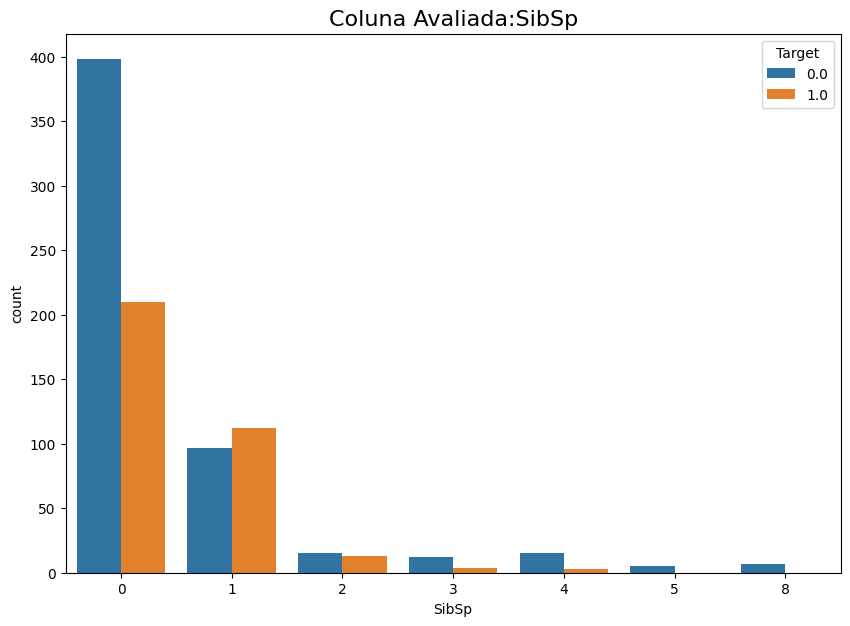

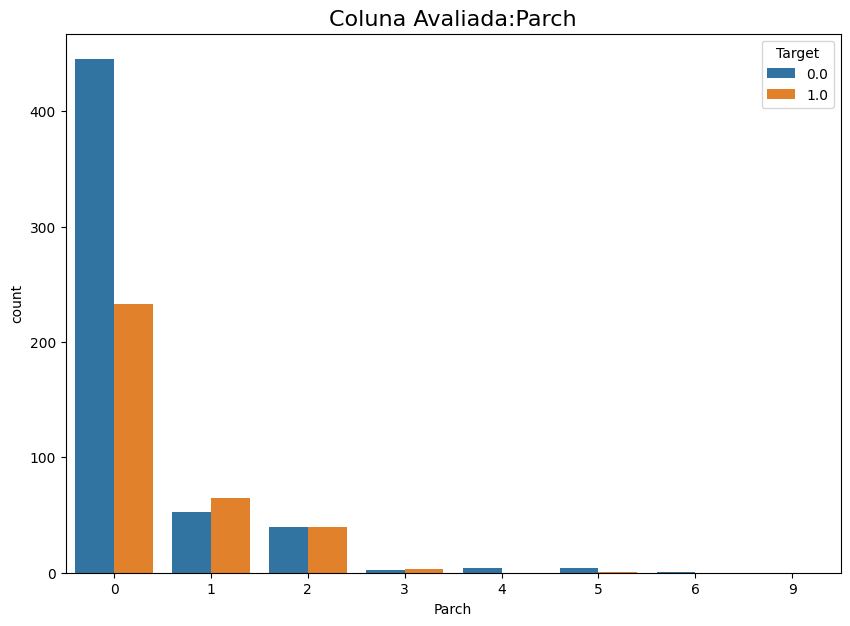

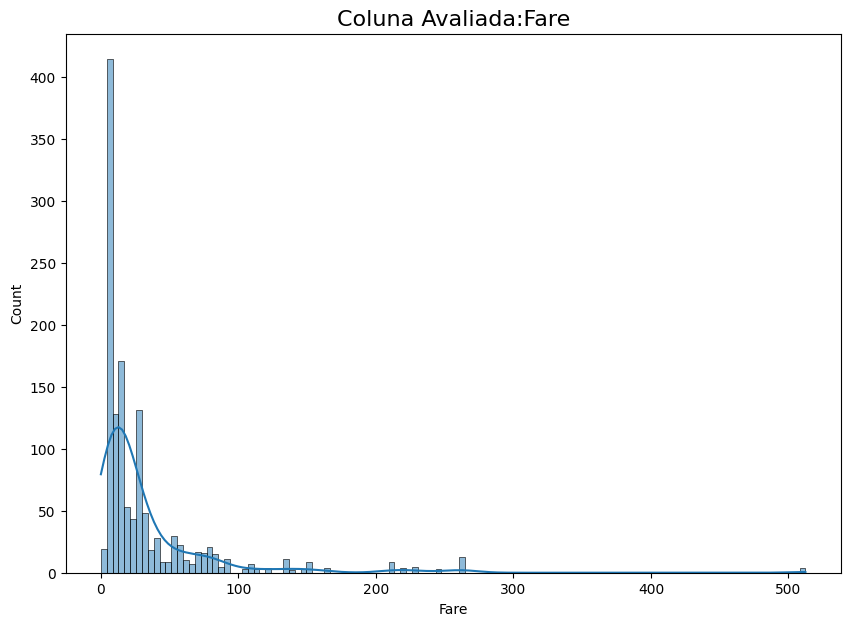

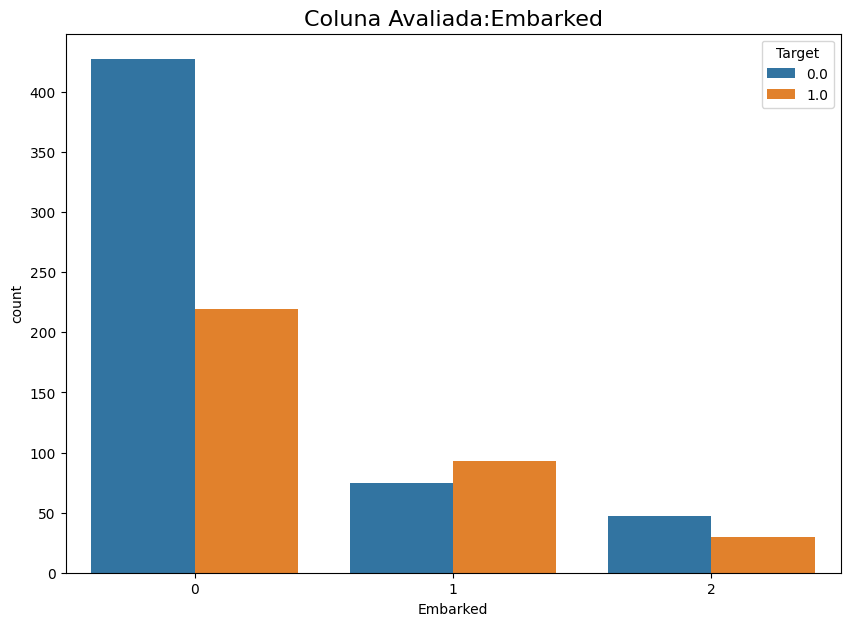

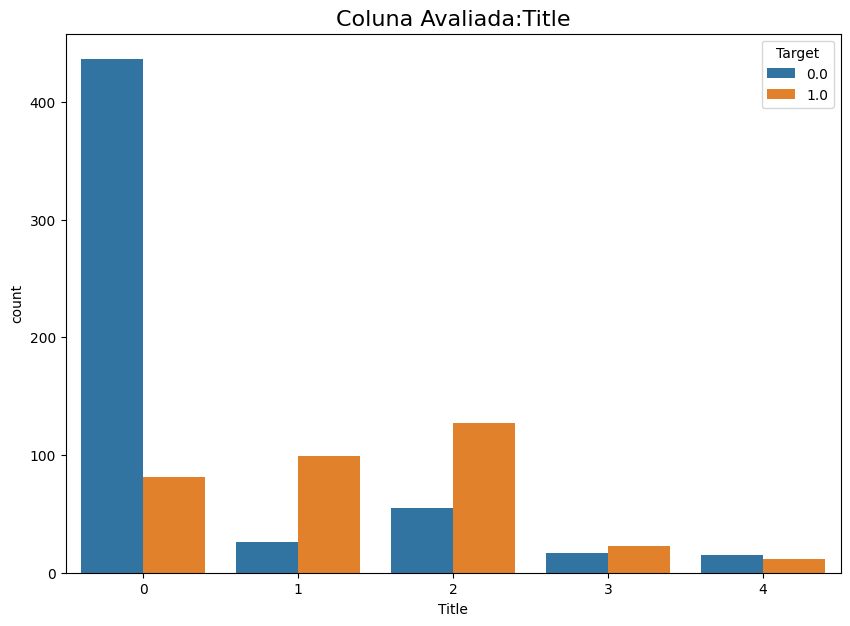

In [77]:
for c in dados.columns:
    
    plt.figure(figsize = (10,7))
    plt.title(f"Coluna Avaliada:{c}", fontsize = 16)
    
    if c in ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Title']:
        sns.countplot(x = dados[c], hue = dados['Target'])
        
    if c in numericas:
        sns.histplot(dados[c], kde=True)
    
              

## Aplicando Modelos de ML com StandardScaler:

In [ ]:
def Auto_ml(X, Y, algoritmo, opt):
    
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=64)
    
    scaler = StandardScaler()
    
    x_train = scaler.fit_transform(x_train)
    
    x_test = scaler.transform(x_test)
    
    if opt == 0:
        ml = algoritmo(random_state = 42)
        
    elif opt == 1:
        ml = algoritmo(max_iter=1000, random_state = 42)
        
    elif opt == 2:
        ml = algoritmo(n_estimators=1000, random_state = 42)
        
    ml.fit(x_train, y_train.values.ravel())
    
    score_train = ml.score(x_train, y_train)
    print(f"Acurácia Treino: {score_train*100:.2f}%")
    
    score_test = ml.score(x_test, y_test)
    print(f"Acurácia Teste: {score_test*100:.2f}%")
    
    y_pred = ml.predict(x_test)
    
    print("----Classification Report----")
    print(classification_report(y_pred, y_test))
    
    print("----Confusion Matrix----")
    m_confusion =  confusion_matrix(y_pred, y_test)
    
    sns.heatmap(data=m_confusion, cmap = 'Blues', annot = True)
    
    return score_train, score_test
        

In [ ]:
Gauss_train, Gasus_test = Auto_ml(X, Y, GaussianProcessClassifier, 0)

In [ ]:
log_train, log_test = Auto_ml(X, Y, LogisticRegression, 1)

In [ ]:
Ada_train, Ada_test = Auto_ml(X, Y, AdaBoostClassifier, 0)

In [ ]:
GBC_train, GBC_test = Auto_ml(X, Y, GradientBoostingClassifier, 0)

In [ ]:
Bag_train, Bag_test = Auto_ml(X, Y,BaggingClassifier , 0) 

In [ ]:
tree_train, tree_test = Auto_ml(X, Y,DecisionTreeClassifier , 0) 

In [78]:
X.drop('PassengerId', axis = 1, inplace = True)

In [79]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

### GridSearch  no GBoostingClassifier

In [ ]:
parametros_GBC = {'learning_rate': [0.1,0.05],
                  'criterion': ['squared_error'],
                  'max_depth' : [3,5]
                 }

grid_GBC = GridSearchCV(estimator = GradientBoostingClassifier(), param_grid = parametros_GBC, cv=10)
grid_GBC.fit(x_train, y_train.values.ravel())

m_parametros_GBC = grid_GBC.best_params_
m_resultado_GBC = grid_GBC.best_score_

print(m_parametros_GBC)
print(m_resultado_GBC)

In [ ]:
# Parâmetros para RandomForestClassifier

parametros_RF = {'criterion': ['gini', 'entropy'],
              'n_estimators': [100, 200],
              'min_samples_split': [2,5,10],
              'min_samples_leaf':[1,3],
              'ccp_alpha': [0.01,0.1,0.02,0.2]}

grid_RF = GridSearchCV(estimator=RandomForestClassifier(), param_grid = parametros_RF)

grid_RF.fit(x_train, y_train.values.ravel())

melhores_parametros = grid_RF.best_params_
melhor_resultado = grid_RF.best_score_

print(melhores_parametros)
print(melhor_resultado)

In [80]:
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier

In [ ]:
XGBC_train, XGBC_test = Auto_ml(X, Y, XGBClassifier, 0)

In [ ]:
modelo  = XGBRFClassifier()

In [ ]:
modelo.fit(x_train, y_train)

In [ ]:
y_pred = modelo.predict(x_test)

In [ ]:
score_train = modelo.score(x_train, y_train)
print(f"Acurácia Treino: {score_train*100:.2f}%")
    
score_test = modelo.score(x_test, y_test)
print(f"Acurácia Teste: {score_test*100:.2f}%")
    
print("----Classification Report----")
print(classification_report(y_pred, y_test))
    
print("----Confusion Matrix----")
m_confusion =  confusion_matrix(y_pred, y_test)
    
sns.heatmap(data=m_confusion, cmap = 'Blues', annot = True)
plt.show()
    

## GridSearch XGBoost:

In [ ]:

parametros_XGB = {'n_estimators': [50,100,150,200],
                  'booster': ['gbtree', 'gblinear', 'dart']}

grid_XGB = GridSearchCV(estimator= XGBClassifier(), param_grid = parametros_XGB, cv=10)

grid_XGB.fit(x_train, y_train.values.ravel())

melhores_parametros = grid_XGB.best_params_
melhor_resultado = grid_XGB.best_score_

print(melhores_parametros)
print(melhor_resultado)

## GridSearch BaggingClassifier:

In [ ]:
parametros_GBag = {'n_estimators': [25,50,200],
                  'max_samples': [5,10,50],
                  'random_state': [44]}

grid_GBag = GridSearchCV(estimator= BaggingClassifier(), param_grid = parametros_GBag, cv=10)

grid_GBag.fit(x_train, y_train.values.ravel())

melhores_parametros = grid_GBag.best_params_
melhor_resultado = grid_GBag.best_score_

print(melhores_parametros)

print(melhor_resultado)

        


In [81]:
dados_2 = dados[:891][:]
dados_3 = dados_2[dados_2.Target == 0].sample(207)
x_sub = df_submit.drop(columns = ['Target'], inplace = True)
x_sub = df_submit[['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Title', 'Age', 'Fare']]

In [82]:
x_train.columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Title', 'Age', 'Fare'], dtype='object')

In [ ]:
dados_3[dados_3.Target == 0].count()

In [83]:
modelo_final = XGBClassifier(n_estimators=50, random_state=44, booster = 'gbtree')

In [84]:
modelo_final.fit(x_train,y_train.values.ravel())


XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=44, ...)

In [85]:
print(modelo_final.score(x_train, y_train))

0.9582664526484751


In [86]:
y_pred_final = modelo_final.predict(x_sub)

In [87]:
df_submit['Target'] = y_pred_final

In [88]:
df_submit.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
Target         0
dtype: int64

In [89]:
df_submit.rename(columns = {'Target': 'Survived'}, inplace = True)

In [90]:
df_submit.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title', 'Survived'],
      dtype='object')

In [91]:
df_submit.drop(columns=['Pclass', 'Sex' ,'Age' ,'SibSp', 'Parch', 'Fare', 'Embarked', 'Title'], inplace=True)

In [92]:
df_submit.to_csv('Titanic_XGB.csv', index = False)